In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

# Charger le dataset iris
data = load_breast_cancer()
X_res, y_res = data.data, data.target

adasyn = ADASYN(random_state=42)
X, y= adasyn.fit_resample(X_res, y_res)

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser (utile pour KNN et régression logistique)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entraîner le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Tester
y_pred_knn = knn.predict(X_test_scaled)


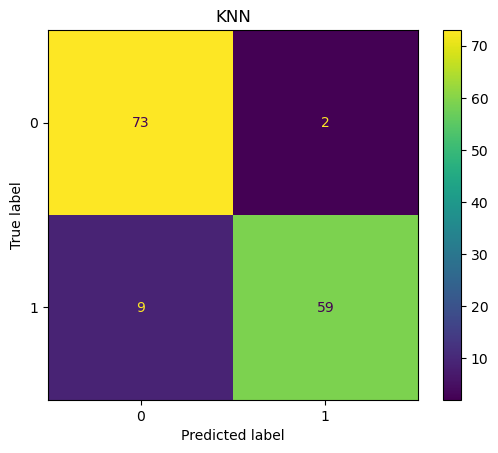

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot()
plt.title("KNN")
plt.show()

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

# Exemple pour y_test et y_pred

print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision :", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall :", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred_knn, average='weighted'))




Accuracy : 0.9230769230769231
Precision : 0.9268446467566819
Recall : 0.9230769230769231
F1-score : 0.9227047085142182
